# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 85s 1us/step


In [10]:
#總共有20大類，每個類組各有5種類別，編入字典
label_dict={0:'aquatic mammals',1:'fish',2:'flowers',3:'food containers',4:'fruit and vegetables',
           5:'household electrical devices',6:'household furniture',7:'insects',8:'large carnivores',9:'large man-made outdoor things',
           10:'large natural outdoor scenes',11:'large omnivores and herbivores',12:'medium-sized mammals',13:'non-insect invertebrates',14:'people',
           15:'reptiles',16:'small mammals',17:'trees',18:'vehicles 1',19:'vehicles 2'}

In [17]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()  #Get the current figure.If no current figure exists, a new one is created using figure().
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #把圖切成 5*5子圖，而ax為第1+i圖
        ax.imshow(images[idx],cmap='binary')  #imshow：Display an image，在此就是把image[idx]圖現在ax上
        
        #計算出類組
        target=labels[i][0]//5
        title=str(i)+','+label_dict[target]

        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [44]:
y_label_train[0]

array([19])

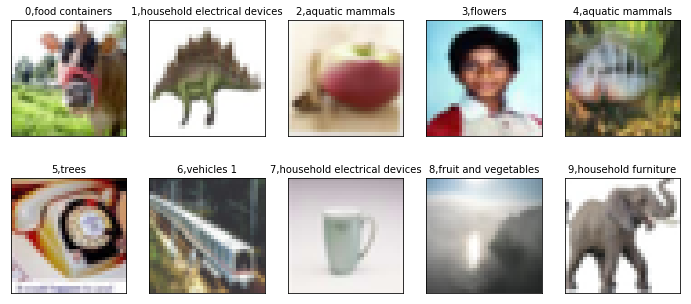

In [31]:
#dataset訂立的分類標籤和原圖對不起來

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

# Image normalize 

In [32]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [33]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [34]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [35]:
from keras.utils import np_utils #keras用於轉換的套件
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [36]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.